<a href="https://colab.research.google.com/github/intancitra/healthyplate/blob/dev/ML/CNN_for_ingredients_image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import zipfile
import random
import shutil
import tensorflow as tf
from shutil import copyfile
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array, load_img

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
file_zip = 'drive/MyDrive/HealthyPlate/ingredients_images_rev.zip'
zip_ref = zipfile.ZipFile(file_zip, 'r')
zip_ref.extractall()
zip_ref.close

<bound method ZipFile.close of <zipfile.ZipFile filename='drive/MyDrive/HealthyPlate/ingredients_images_rev.zip' mode='r'>>

In [4]:
source_path = 'ingredients_images'

source_path_apple = os.path.join(source_path, 'apple')
source_path_onion = os.path.join(source_path, 'onion')
source_path_garlic = os.path.join(source_path, 'garlic')
source_path_chili = os.path.join(source_path, 'chilli')
source_path_chicken = os.path.join(source_path, 'raw chicken')
source_path_leek = os.path.join(source_path, 'leek')
source_path_corn = os.path.join(source_path, 'corn')
source_path_ginger = os.path.join(source_path, 'ginger')
source_path_orange = os.path.join(source_path, 'orange')
source_path_banana = os.path.join(source_path, 'banana')
source_path_tofu = os.path.join(source_path, 'raw tofu')
source_path_egg = os.path.join(source_path, 'egg')
source_path_tempeh = os.path.join(source_path, 'raw tempeh')
source_path_tomato = os.path.join(source_path, 'tomato')
source_path_carrot = os.path.join(source_path, 'carrot')
source_path_broccoli = os.path.join(source_path, 'broccoli')
source_path_cabbage = os.path.join(source_path, 'cabbage')
source_path_cauliflower = os.path.join(source_path, 'cauliflower')
source_path_peanut = os.path.join(source_path, 'peanut')
source_path_potato = os.path.join(source_path, 'potato')
source_path_mustardgreens = os.path.join(source_path, 'sawi')
source_path_shallot = os.path.join(source_path, 'shallot')

# os.listdir returns a list containing all files under the given path
print(f"There are {len(os.listdir(source_path_apple))} images of apple.")
print(f"There are {len(os.listdir(source_path_onion))} images of onion.")
print(f"There are {len(os.listdir(source_path_garlic))} images of garlic.")
print(f"There are {len(os.listdir(source_path_chili))} images of chili.")
print(f"There are {len(os.listdir(source_path_chicken))} images of chicken.")
print(f"There are {len(os.listdir(source_path_leek))} images of leek.")
print(f"There are {len(os.listdir(source_path_corn))} images of corn.")
print(f"There are {len(os.listdir(source_path_ginger))} images of ginger.")
print(f"There are {len(os.listdir(source_path_orange))} images of orange.")
print(f"There are {len(os.listdir(source_path_banana))} images of banana.")
print(f"There are {len(os.listdir(source_path_tofu))} images of tofu.")
print(f"There are {len(os.listdir(source_path_egg))} images of egg.")
print(f"There are {len(os.listdir(source_path_tempeh))} images of tempeh.")
print(f"There are {len(os.listdir(source_path_tomato))} images of tomato.")
print(f"There are {len(os.listdir(source_path_carrot))} images of carrot.")
print(f"There are {len(os.listdir(source_path_broccoli))} images of broccoli.")
print(f"There are {len(os.listdir(source_path_cauliflower))} images of cauliflower.")
print(f"There are {len(os.listdir(source_path_peanut))} images of peanut.")
print(f"There are {len(os.listdir(source_path_potato))} images of potato.")
print(f"There are {len(os.listdir(source_path_mustardgreens))} images of mustard greens.")
print(f"There are {len(os.listdir(source_path_shallot))} images of shallot.")
print(f"There are {len(os.listdir(source_path_cabbage))} images of cabbage.")

There are 100 images of apple.
There are 100 images of onion.
There are 100 images of garlic.
There are 100 images of chili.
There are 100 images of chicken.
There are 100 images of leek.
There are 100 images of corn.
There are 100 images of ginger.
There are 100 images of orange.
There are 100 images of banana.
There are 100 images of tofu.
There are 100 images of egg.
There are 100 images of tempeh.
There are 100 images of tomato.
There are 100 images of carrot.
There are 100 images of broccoli.
There are 100 images of cauliflower.
There are 100 images of peanut.
There are 100 images of potato.
There are 100 images of mustard greens.
There are 100 images of shallot.
There are 100 images of cabbage.


In [5]:
# Define root directory
root_dir = 'ingredients_dataset'

# Empty directory to prevent FileExistsError is the function is run several times
if os.path.exists(root_dir):
  shutil.rmtree(root_dir)

def create_train_test_dirs(root_path):

      try:
        subdirs = ['apple', 'banana', 'broccoli', 'cabbage', 'carrot', 'cauliflower', 'chili', 'corn', 'egg', 'garlic', 'ginger', 'leek', 'onion', 'orange', 'peanut', 'potato', 'chicken', 'tempeh', 'tofu', 'mustardgreens', 'shallot', 'tomato']

        for subdir in subdirs:
          train_dir = os.path.join(root_path,'training')
          train_path = os.path.join(train_dir, subdir)
          os.makedirs(train_path)
          test_dir = os.path.join(root_path,'testing')
          test_path = os.path.join(test_dir, subdir)
          os.makedirs(test_path)
          val_dir = os.path.join(root_path,'validation')
          val_path = os.path.join(val_dir, subdir)
          os.makedirs(val_path)

      except OSError:
          pass

try:
  create_train_test_dirs(root_path=root_dir)
except FileExistsError:
  print("You should not be seeing this since the upper directory is removed beforehand")


In [6]:
for rootdir, dirs, files in os.walk(root_dir):
    for subdir in dirs:
        print(os.path.join(rootdir, subdir))

ingredients_dataset/training
ingredients_dataset/validation
ingredients_dataset/testing
ingredients_dataset/training/broccoli
ingredients_dataset/training/chili
ingredients_dataset/training/leek
ingredients_dataset/training/ginger
ingredients_dataset/training/onion
ingredients_dataset/training/egg
ingredients_dataset/training/cabbage
ingredients_dataset/training/garlic
ingredients_dataset/training/chicken
ingredients_dataset/training/orange
ingredients_dataset/training/peanut
ingredients_dataset/training/potato
ingredients_dataset/training/cauliflower
ingredients_dataset/training/carrot
ingredients_dataset/training/banana
ingredients_dataset/training/tempeh
ingredients_dataset/training/tomato
ingredients_dataset/training/corn
ingredients_dataset/training/apple
ingredients_dataset/training/shallot
ingredients_dataset/training/tofu
ingredients_dataset/training/mustardgreens
ingredients_dataset/validation/broccoli
ingredients_dataset/validation/chili
ingredients_dataset/validation/leek
in

In [7]:
def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):

    files=[]
    for filename in os.listdir(SOURCE):
      file = SOURCE + filename
      if os.path.getsize(file) > 0:
        files.append(filename)
      else:
        print(filename + " is zero length, so ignoring.")
    
    training_length = int(len(files) * SPLIT_SIZE)
    testing_length = int(len(files) - training_length)
    shuffled_set = random.sample(files, len(files))
    training_set = shuffled_set[0:training_length]
    testing_set = shuffled_set[-testing_length:]

    for filename in training_set:
      this_file = SOURCE + filename
      destination = TRAINING + filename
      copyfile(this_file, destination)

    for filename in testing_set:
      this_file = SOURCE + filename
      destination = TESTING + filename
      copyfile(this_file, destination)

In [ ]:
os.makedirs('ingredients_dataset/temp')

In [9]:
dirs = ['apple', 'banana', 'broccoli', 'cabbage', 'carrot', 'cauliflower', 'chilli', 'corn', 'egg',
        'garlic', 'ginger', 'leek', 'onion', 'orange', 'peanut', 'potato', 'raw chicken', 'raw tempeh', 'raw tofu',
        'sawi', 'shallot', 'tomato']

for dir in dirs:
  if dir=="chilli":
    dir1 = "chili"
  elif dir=="raw chicken":
    dir1 = "chicken"
  elif dir=="raw tempeh":
    dir1 = "tempeh"
  elif dir=="raw tofu":
    dir1 = "tofu"
  elif dir=="sawi":
    dir1 = "mustardgreens"
  else:
    dir1 = dir
  SOURCE_DIR = "ingredients_images/"+dir+"/"
  TRAINING_DIR = "ingredients_dataset/training/"
  #TESTING_DIR = "ingredients_dataset/testing/"
  VALIDATION_DIR = "ingredients_dataset/validation/"
  #temp = "ingredients_dataset/temp/"
  TRAIN_DIR = os.path.join(TRAINING_DIR, dir1+"/")
  #TEST_DIR = os.path.join(TESTING_DIR, dir1+"/")
  VAL_DIR = os.path.join(VALIDATION_DIR, dir1+"/")

  if len(os.listdir(TRAIN_DIR)) > 0:
    for file in os.scandir(TRAIN_DIR):
      os.remove(file.path)
  #if len(os.listdir(TEST_DIR)) > 0:
    #for file in os.scandir(TEST_DIR):
     # os.remove(file.path)
  if len(os.listdir(VAL_DIR)) > 0:
    for file in os.scandir(VAL_DIR):
      os.remove(file.path)
  #if len(os.listdir(temp)) > 0:
    #for file in os.scandir(temp):
     # os.remove(file.path)
  
  # Define proportion of images used for training
  split_size = .8

  # Messages about zero length images should be printed out
  split_data(SOURCE_DIR, TRAIN_DIR, VAL_DIR, split_size)
  #split_data(temp, TEST_DIR, VAL_DIR, 0.5)

  # Check that the number of images matches the expected output
  mess1 = "There are " + str(len(os.listdir(TRAIN_DIR))) + " images of " + dir + " for training"
  #mess2 = "There are " + str(len(os.listdir(TEST_DIR))) + " images of " + dir + " for testing"
  mess3 = "There are " + str(len(os.listdir(VAL_DIR))) + " images of " + dir + " for validation"
  print(mess1)
  print(mess3)
  #print(mess2)

There are 80 images of apple for training
There are 20 images of apple for validation
There are 80 images of banana for training
There are 20 images of banana for validation
There are 80 images of broccoli for training
There are 20 images of broccoli for validation
There are 80 images of cabbage for training
There are 20 images of cabbage for validation
There are 80 images of carrot for training
There are 20 images of carrot for validation
There are 80 images of cauliflower for training
There are 20 images of cauliflower for validation
There are 80 images of chilli for training
There are 20 images of chilli for validation
There are 80 images of corn for training
There are 20 images of corn for validation
There are 80 images of egg for training
There are 20 images of egg for validation
There are 80 images of garlic for training
There are 20 images of garlic for validation
There are 80 images of ginger for training
There are 20 images of ginger for validation
There are 80 images of leek 

In [10]:
def train_val_generators(TRAINING_DIR, VALIDATION_DIR):

  # Instantiate the ImageDataGenerator class
  train_datagen = ImageDataGenerator(rescale= 1.0/255.0,
                                     rotation_range= 40,
                                     width_shift_range= 0.2,
                                     height_shift_range= 0.2,
                                     shear_range= 0.2,
                                     zoom_range= 0.2,
                                     horizontal_flip= True)

  # Pass in the appropiate arguments to the flow_from_directory method
  train_generator = train_datagen.flow_from_directory(directory= TRAINING_DIR,
                                                      batch_size=32,
                                                      class_mode='categorical',
                                                      target_size=(150, 150))

  # Instantiate the ImageDataGenerator class
  validation_datagen = ImageDataGenerator(rescale = 1./255.,
                                          rotation_range= 40,
                                          width_shift_range= 0.2,
                                          height_shift_range= 0.2,
                                          shear_range= 0.2,
                                          zoom_range= 0.2,
                                          horizontal_flip= True)

  # Pass in the appropiate arguments to the flow_from_directory method
  validation_generator = validation_datagen.flow_from_directory(directory= VALIDATION_DIR,
                                                                batch_size=32,
                                                                class_mode='categorical',
                                                                target_size=(150, 150))
  return train_generator, validation_generator

In [11]:
TRAINING_DIR = "ingredients_dataset/training/"
TESTING_DIR = "ingredients_dataset/testing/"
VALIDATION_DIR = "ingredients_dataset/validation/"

train_generator, validation_generator = train_val_generators(TRAINING_DIR, VALIDATION_DIR)

Found 1760 images belonging to 22 classes.
Found 440 images belonging to 22 classes.


In [12]:
# Download the inception v3 weights
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

--2022-06-05 14:57:48--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.69.128, 172.217.219.128, 209.85.147.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.69.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

/tmp/inception_v3_w 100%[===================>]  83.84M   220MB/s    in 0.4s    

2022-06-05 14:57:49 (220 MB/s) - ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]



In [13]:
# Import the inception model  
from tensorflow.keras.applications.inception_v3 import InceptionV3

# Create an instance of the inception model from the local pre-trained weights
local_weights_file = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

In [14]:
def create_pre_trained_model(local_weights_file):

  pre_trained_model = InceptionV3(input_shape = (150, 150, 3),
                                  include_top = False, 
                                  weights = None) 

  pre_trained_model.load_weights(local_weights_file)

  # Make all the layers in the pre-trained model non-trainable
  for layer in pre_trained_model.layers:
    layer.trainable = False

  return pre_trained_model

In [15]:
pre_trained_model = create_pre_trained_model(local_weights_file)

# Print the model summary
pre_trained_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 74, 74, 32)   864         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 74, 74, 32)  96          ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                       

In [16]:
total_params = pre_trained_model.count_params()
num_trainable_params = sum([w.shape.num_elements() for w in pre_trained_model.trainable_weights])

print(f"There are {total_params:,} total parameters in this model.")
print(f"There are {num_trainable_params:,} trainable parameters in this model.")

There are 21,802,784 total parameters in this model.
There are 0 trainable parameters in this model.


In [17]:
# Define a Callback class that stops training once accuracy reaches 99.9%
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.999):
      print("\nReached 99.9% accuracy so cancelling training!")
      self.model.stop_training = True

In [18]:
def output_of_last_layer(pre_trained_model):

  last_desired_layer = pre_trained_model.get_layer('mixed7')
  print('last layer output shape: ', last_desired_layer.output_shape)
  last_output = last_desired_layer.output
  print('last layer output: ', last_output)

  return last_output

In [19]:
last_output = output_of_last_layer(pre_trained_model)

last layer output shape:  (None, 7, 7, 768)
last layer output:  KerasTensor(type_spec=TensorSpec(shape=(None, 7, 7, 768), dtype=tf.float32, name=None), name='mixed7/concat:0', description="created by layer 'mixed7'")


In [20]:
print(f"The pretrained model has type: {type(pre_trained_model)}")

The pretrained model has type: <class 'keras.engine.functional.Functional'>


In [21]:
def create_final_model(pre_trained_model, last_output):
  # Flatten the output layer to 1 dimension
  x = layers.Flatten()(last_output)

  # Add a fully connected layer with 1024 hidden units and ReLU activation
  x = layers.Dense(1024, activation='relu')(x)
  # Add a dropout rate of 0.2
  x = layers.Dropout(0.2)(x)  
  # Add a final softmax layer for classification
  x = layers.Dense(22, activation='softmax')(x)        

  # Create the complete model by using the Model class
  model = Model(pre_trained_model.input, x)

  # Compile the model
  model.compile(optimizer = 'adam', 
                loss = 'categorical_crossentropy',
                metrics = ['accuracy'])
  
  return model

In [22]:
# Save the model in a variable
model = create_final_model(pre_trained_model, last_output)

# Inspect parameters
total_params = model.count_params()
num_trainable_params = sum([w.shape.num_elements() for w in model.trainable_weights])

print(f"There are {total_params:,} total parameters in this model.")
print(f"There are {num_trainable_params:,} trainable parameters in this model.")

There are 47,534,006 total parameters in this model.
There are 38,558,742 trainable parameters in this model.


In [23]:
callbacks = myCallback()
history = model.fit(train_generator,
                    validation_data = validation_generator,
                    epochs = 20)

Epoch 1/20
45/55 [=======================>......] - ETA: 21s - loss: 3.6661 - accuracy: 0.3486

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


55/55 [==============================] - 156s 3s/step - loss: 3.3108 - accuracy: 0.3818 - val_loss: 1.3512 - val_accuracy: 0.5841
Epoch 2/20
55/55 [==============================] - 149s 3s/step - loss: 1.3064 - accuracy: 0.6028 - val_loss: 1.1181 - val_accuracy: 0.6591
Epoch 3/20
55/55 [==============================] - 151s 3s/step - loss: 1.0056 - accuracy: 0.6886 - val_loss: 1.0308 - val_accuracy: 0.6955
Epoch 4/20
55/55 [==============================] - 149s 3s/step - loss: 0.8897 - accuracy: 0.7210 - val_loss: 0.9393 - val_accuracy: 0.7068
Epoch 5/20
55/55 [==============================] - 151s 3s/step - loss: 0.7883 - accuracy: 0.7534 - val_loss: 1.0431 - val_accuracy: 0.6750
Epoch 6/20
55/55 [==============================] - 149s 3s/step - loss: 0.7912 - accuracy: 0.7494 - val_loss: 0.9105 - val_accuracy: 0.7091
Epoch 7/20
55/55 [==============================] - 149s 3s/step - loss: 0.7266 - accuracy: 0.7636 - val_loss: 0.8602 - val_accuracy: 0.7386
Epoch 8/20
55/55 [======

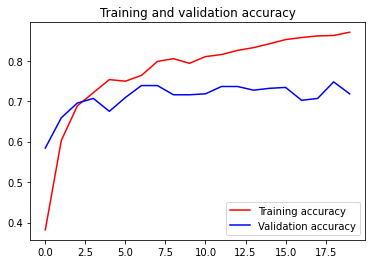

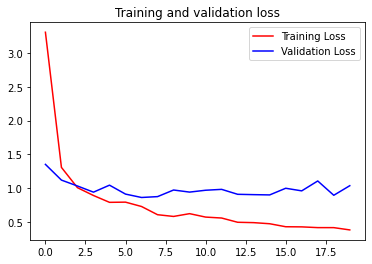

In [24]:
# Plot the chart for accuracy and loss on both training and validation
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [33]:
train_generator.class_indices

{'apple': 0,
 'banana': 1,
 'broccoli': 2,
 'cabbage': 3,
 'carrot': 4,
 'cauliflower': 5,
 'chicken': 6,
 'chili': 7,
 'corn': 8,
 'egg': 9,
 'garlic': 10,
 'ginger': 11,
 'leek': 12,
 'mustardgreens': 13,
 'onion': 14,
 'orange': 15,
 'peanut': 16,
 'potato': 17,
 'shallot': 18,
 'tempeh': 19,
 'tofu': 20,
 'tomato': 21}

In [25]:
export_dir = 'saved_model/1'

tf.saved_model.save(model, export_dir)

INFO:tensorflow:Assets written to: saved_model/1/assets


In [26]:
# Select mode of optimization
mode = "else" 

if mode == 'Storage':
    optimization = tf.lite.Optimize.OPTIMIZE_FOR_SIZE
elif mode == 'Speed':
    optimization = tf.lite.Optimize.OPTIMIZE_FOR_LATENCY
else:
    optimization = tf.lite.Optimize.DEFAULT

In [27]:
# Use the TFLiteConverter SavedModel API to initialize the converter

converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)

# Set the optimzations
converter.optimizations = [optimization]

# Invoke the converter to finally generate the TFLite model
tflite_model = converter.convert()

In [28]:
import pathlib

tflite_model_file = pathlib.Path('./model.tflite')
tflite_model_file.write_bytes(tflite_model)

47778480

In [29]:
# Load TFLite model and allocate tensors.
interpreter = tf.lite.Interpreter(model_content=tflite_model)
interpreter.allocate_tensors()

input_index = interpreter.get_input_details()[0]["index"]
output_index = interpreter.get_output_details()[0]["index"]

In [ ]:
# Write a function to normalize the images.

def format_example(image, label):
    # Cast image to float32
    image = tf.cast(image, tf.float32)
    
    # Normalize the image in the range [0, 1]
    image = image/255.0 # YOUR CODE HERE
    
    return image, label

In [30]:
saved_model_path = "./my_model.h5"

model.save(saved_model_path)

In [31]:
!pip install tensorflowjs

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 77 kB 2.9 MB/s 
     |████████████████████████████████| 40 kB 4.3 MB/s 
  Attempting uninstall: packaging
    Found existing installation: packaging 21.3
    Uninstalling packaging-21.3:
      Successfully uninstalled packaging-21.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [32]:
# Use the tensorflow.js converter to convert the saved Keras model into JSON format.

!tensorflowjs_converter --input_format=keras {saved_model_path} ./

In [ ]:
import numpy

# Gather results for the randomly sampled test images
predictions = []
test_labels = []
test_images = []

test_batches = TESTING_DIR.map(format_example).batch(1)

for img, label in TESTING_DIR.take(50):
    interpreter.set_tensor(input_index, img)
    interpreter.invoke()
    predictions.append(interpreter.get_tensor(output_index))
    test_labels.append(label[0])
    test_images.append(numpy.array(img))

AttributeError: ignored